## 3.1-3.2 What are the most and the least frequent "cent" digits for the opening price?

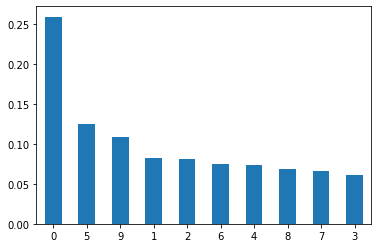

In [1]:
import pandas as pd

df = pd.read_csv("TSLA.csv")
df["Open"] = df["Open"].multiply(other = 100)
df["Open"] = df["Open"].astype(int).astype(str)
df["Last digit"] = df["Open"].apply(lambda x: x[-1])
count_digit = df["Last digit"].value_counts(normalize=True)
count_digit.plot.bar(rot=0)

#### With five-year data, the result shows that digits are not displayed equally. The most frequent digit is 0 taken 26% of total ten digits, while the least frequent digit is 3 with only 6%.

## 3.3 Compute 4 error metrics

In [2]:
df.groupby(["Year", "Last digit"]).count()
grouped_df_ct = pd.crosstab(df['Year'],df['Last digit'], normalize='index')
grouped_df_ct


Last digit,0,1,2,3,4,5,6,7,8,9
Year,,,,,,,,,,
2014,0.218254,0.091270,0.099206,0.039683,0.063492,0.146825,0.083333,0.075397,0.075397,0.107143
2015,0.226190,0.075397,0.075397,0.075397,0.071429,0.138889,0.083333,0.063492,0.091270,0.099206
2016,0.257937,0.079365,0.087302,0.039683,0.083333,0.142857,0.063492,0.067460,0.063492,0.115079
2017,0.290837,0.075697,0.059761,0.083665,0.063745,0.103586,0.063745,0.051793,0.079681,0.127490
2018,0.258964,0.091633,0.047809,0.099602,0.095618,0.103586,0.079681,0.091633,0.039841,0.091633
2019,0.301587,0.083333,0.119048,0.031746,0.063492,0.115079,0.071429,0.043651,0.063492,0.107143


#### In detail, with the percentage of digits displayed each year, 0 is still the most frequent one.

In [3]:
perdiction = 0.1 #equal proportion
absolute_error = grouped_df_ct.apply(lambda x : x - perdiction, axis = 1).abs()
df_error = pd.DataFrame(columns = ("max absolute error","median absolute error","mean absolute error","root mean square error"))
df_error["max absolute error"] = absolute_error.max(axis = 1)
df_error["median absolute error"] = absolute_error.median(axis = 1)
df_error["mean absolute error"] = absolute_error.mean(axis = 1)
df_error["root mean square error"] = absolute_error.agg(lambda x : (x ** 2).mean() ** 0.5, axis = 1)
df_error


,max absolute error,median absolute error,mean absolute error,root mean square error
Year,,,,
2014,0.118254,0.024603,0.034444,0.047712
2015,0.126190,0.024603,0.033016,0.046643
2016,0.157937,0.034524,0.043175,0.059360
2017,0.190837,0.031873,0.044382,0.067104
2018,0.158964,0.008367,0.032510,0.056805
2019,0.201587,0.032540,0.048571,0.072713


#### Checking the MAE year by year, the max value was 0.20 in 2019. As errors are squared before average, RMSE gives a relatively high weight to large errors (actual value which is far from the perdiction) compared with MAE. With that said, RMSE probably easier to detect outliers. The average distance between actual values and predicted values in 2019 was the largest and followed by 2017. 